In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
plt.rcParams["legend.labelspacing"] = 0.2
plt.rcParams["legend.columnspacing"] = 0.4
plt.rcParams['font.size'] = 24
#plt.rcParams['figure.figsize'] = 6,4
_linewidth = 8
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
legend_loc = "upper right"
plt.rcParams['text.color'] = 'black'
keystone_file_path = "iozone.keystone.csv"
baseline_file_path = "iozone.base.csv"
colors=["#FF800E","#006BA4","#ABABAB","#595959","#5F9ED1","#C85200"] #tableau colorblind10 
k_color = colors
k_style = "--"
b_color = colors
b_style = "-"
tp_ticks = [ 100000, 200000, 300000, 400000, 500000]
tp_tick_labels = ["100K","200K","300K","400K","500K"]
record_sizes = ["filesize", "r8", "r128", "r512"]
x_label = "File Size (KB)"
y_label = "Throughput(KB/s)"

op_to_put_legend="Writer Report"
op_to_put_xaxis="Reader Report"
#########################################################

keystone_data = pd.read_csv(keystone_file_path, delimiter=',')
baseline_data = pd.read_csv(baseline_file_path, delimiter=',')
keystone_data.columns = ["filesize", "r4", "r8", "r16", "r32", "r64", "r128", "r256", "r512", "r1024"]
baseline_data.columns = ["filesize", "r4", "r8", "r16", "r32", "r64", "r128", "r256", "r512", "r1024"]


file_sizes = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]
file_size_labels = [64, 128, 256, 512, "1K", "2K", "4K", "8K", "16K", "32K", "64K", "128K", "256K", "512K"]

names = keystone_data.filesize.unique()
operations = []
for name in names:
    try:
        int(name)
    except:
        if type(name) == str and name.find("Report") >= 0:
            operations.append(name)




In [6]:

ops_idxs = {}
for op in operations:
    idx = keystone_data[keystone_data.filesize == op].index[0]
    ops_idxs[op] = (idx+2, idx+16)
ops_idxs


def draw_graph(k_data, b_data, op, f_sizes, r_sizes):
    (start, end) = ops_idxs[op]
    k_subdata = k_data[start:end]
   
    b_subdata = b_data[start:end]
    
    
    # overhead
    overhead = (b_subdata.drop("filesize", axis=1) - k_subdata.drop("filesize", axis=1)) / b_subdata.drop("filesize", axis=1)
    print (overhead.mean().mean())
    print (overhead.std())
    k_subdata = k_subdata[r_sizes]
    b_subdata = b_subdata[r_sizes]
    x = f_sizes
    i = 0
    if (op == op_to_put_xaxis):
        fig = plt.figure(figsize=(13,5))
    else:
        fig = plt.figure(figsize=(13,3.8))
    fig = plt.gcf()
    
    for r_size in r_sizes:
        if(r_size == "filesize"):
            continue
        y = b_subdata[r_size]
        plt.plot(x,y,linestyle=b_style, color=colors[i],linewidth=_linewidth, label="Baseline_%s"%(r_size,))
        y = k_subdata[r_size]
        plt.plot(x,y,linestyle=k_style, color=colors[i],linewidth=_linewidth, label="Keystone_%s"%(r_size,))

        i += 1
    plt.xscale("log")
    
    plt.yticks(tp_ticks, tp_tick_labels)
    plt.ylabel(y_label)

    
    if(op == op_to_put_xaxis):
        plt.xticks(f_sizes, file_size_labels, rotation='vertical')
        plt.xlabel(x_label)
    else:
        plt.xticks(f_sizes,[])
        #plt.xlabel("")
    plt.minorticks_off()
    plt.tight_layout()
    if(op == op_to_put_legend):
        plt.legend(loc=legend_loc, fancybox=True, framealpha=0.5, ncol=3, 
                   bbox_to_anchor=(1, 1.5), handlelength=3)
    
    #removing top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # grid line
    plt.gca().grid(which='major', axis='x', linestyle='--')
    
    # add op
    plt.annotate(op.replace("Report","").strip(), xy=(0.7,0.8), xycoords='axes fraction',
            ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w'))
    
    plt.show()
    fig.savefig(op.replace(" ","_").lower()+".pdf", bbox_inches='tight',format="pdf")
    
    return k_subdata

Writer Report
0.3626256322665726
r4       0.047986
r8       0.067157
r16      0.061198
r32      0.061280
r64      0.054970
r128     0.056660
r256     0.089246
r512     0.085586
r1024    0.029186
dtype: float64


Re-writer Report
0.38075340994603185
r4       0.079214
r8       0.082019
r16      0.078903
r32      0.076351
r64      0.070145
r128     0.067563
r256     0.066063
r512     0.074135
r1024    0.039790
dtype: float64


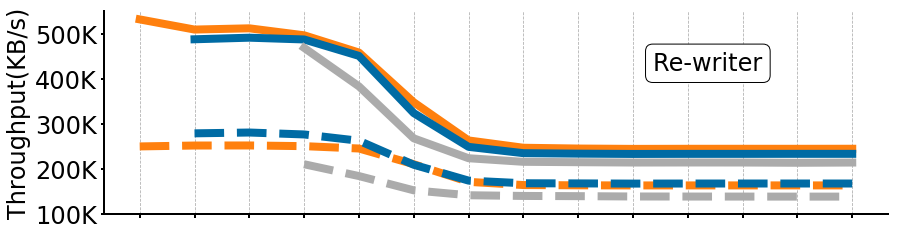

Reader Report
0.4089656754450486
r4       0.081582
r8       0.084709
r16      0.082224
r32      0.076776
r64      0.070742
r128     0.069286
r256     0.061167
r512     0.069832
r1024    0.062659
dtype: float64


Re-reader Report
0.413127056584704
r4       0.085505
r8       0.088103
r16      0.086201
r32      0.079946
r64      0.072600
r128     0.069075
r256     0.062377
r512     0.067891
r1024    0.068304
dtype: float64


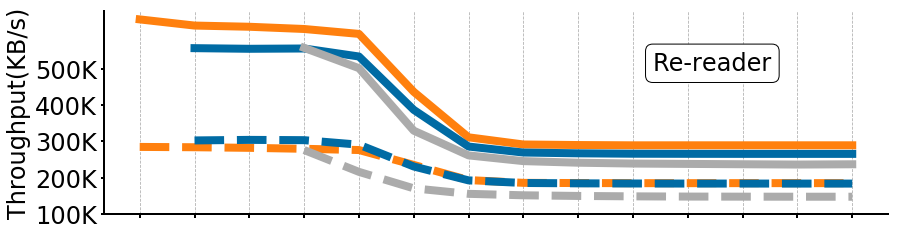

Random Read Report
0.43930385038546543
r4       0.081841
r8       0.087903
r16      0.085636
r32      0.079902
r64      0.075172
r128     0.070053
r256     0.062819
r512     0.071231
r1024    0.067439
dtype: float64


Random Write Report
0.4189722805211285
r4       0.084802
r8       0.090347
r16      0.088272
r32      0.083209
r64      0.080671
r128     0.075129
r256     0.067727
r512     0.068258
r1024    0.054674
dtype: float64


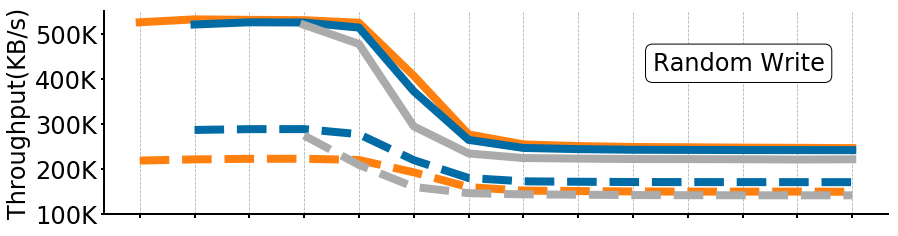

Backward Read Report
0.4396761478626441
r4       0.080837
r8       0.087725
r16      0.086006
r32      0.082264
r64      0.079802
r128     0.074058
r256     0.064759
r512     0.070944
r1024    0.066618
dtype: float64


Record Rewrite Report
0.5512856794628962
r4       0.001837
r8       0.004102
r16      0.012082
r32      0.002473
r64      0.003037
r128     0.001077
r256     0.002250
r512     0.032186
r1024    0.034019
dtype: float64


Stride Read Report
0.4538697129415829
r4       0.087268
r8       0.106631
r16      0.115072
r32      0.084404
r64      0.075717
r128     0.072185
r256     0.063373
r512     0.060244
r1024    0.106250
dtype: float64


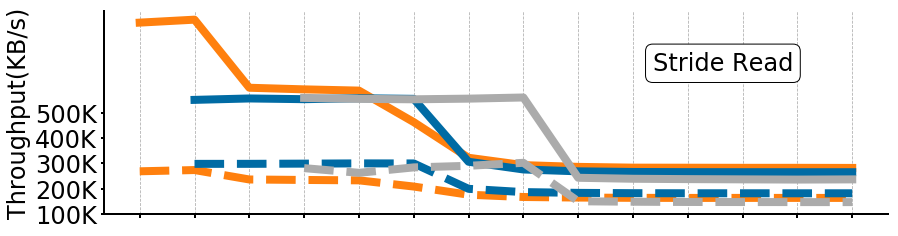

Fwrite Report
0.4257209230591974
r4       0.080395
r8       0.087443
r16      0.085881
r32      0.081549
r64      0.078980
r128     0.073552
r256     0.075264
r512     0.071701
r1024    0.057591
dtype: float64


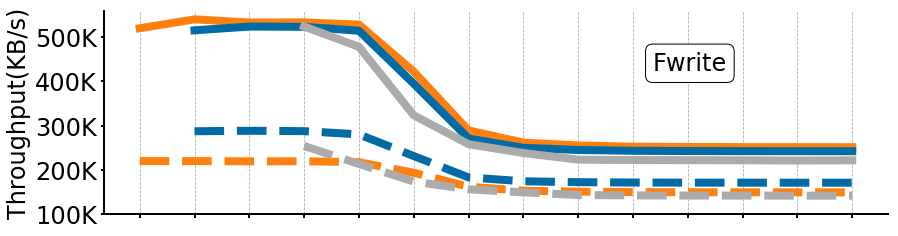

Re-fwrite Report
0.42344789960294493
r4       0.084639
r8       0.090593
r16      0.088280
r32      0.084809
r64      0.080142
r128     0.075899
r256     0.071949
r512     0.076918
r1024    0.060724
dtype: float64


Fread Report
0.20547670906690915
r4       0.016308
r8       0.015893
r16      0.014095
r32      0.025416
r64      0.096584
r128     0.092832
r256     0.111942
r512     0.104684
r1024    0.134639
dtype: float64


Re-fread Report
0.20915677831316215
r4       0.016026
r8       0.015500
r16      0.015428
r32      0.027476
r64      0.096843
r128     0.085526
r256     0.107618
r512     0.100258
r1024    0.134858
dtype: float64


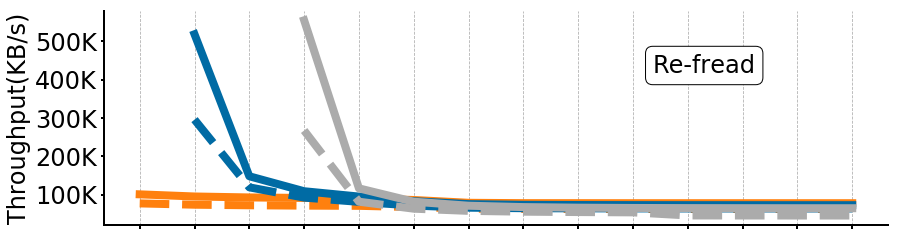

In [7]:
for op in operations:
    print(op)
    draw_graph(keystone_data, baseline_data, op, file_sizes, record_sizes)

In [6]:
keystone_data

filesize        r4        r8  \
0                                                  NaN       NaN       NaN   
1    The top row is records sizes,the left column i...       NaN       NaN   
2                                        Writer Report       NaN       NaN   
3                                                  NaN       4.0       8.0   
4                                                   64  124417.0  211714.0   
5                                                  128  159265.0  222819.0   
6                                                  256  162210.0  223454.0   
7                                                  512  162062.0  223182.0   
8                                                 1024  158870.0  217666.0   
9                                                 2048  144479.0  195150.0   
10                                                4096  139859.0  164636.0   
11                                                8192  139309.0  156130.0   
12                                               16384  138905.0  153721.0   
13                                               32768  138597.0  152161.0   
14                                               65536  138182.0  151594.0   
15                                              131072  138272.0  151202.0   
16                                              262144  138031.0  151149.0   
17                                              524288  138073.0  150939.0   
18                                    Re-writer Report       NaN       NaN   
19                                                 NaN       4.0       8.0   
20                                                  64  218389.0  250784.0   
21                                                 128  215329.0  252768.0   
22                                                 256  213188.0  252917.0   
23                                                 512  206941.0  251390.0   
24                                                1024  192493.0  246157.0   
25                                                2048  171268.0  211253.0   
26                                                4096  155028.0  172069.0   
27                                                8192  150244.0  164968.0   
28                                               16384  149760.0  164404.0   
29                                               32768  149564.0  164112.0   
30                                               65536  149498.0  164186.0   
31                                              131072  149530.0  164190.0   
32                                              262144  149566.0  164197.0   
33                                              524288  149668.0  164152.0   
34                                       Reader Report       NaN       NaN   
35                                                 NaN       4.0       8.0   
36                                                  64  243538.0  283440.0   
37                                                 128  247495.0  282153.0   
38                                                 256  245625.0  282218.0   
39                                                 512  242541.0  279656.0   
40                                                1024  229755.0  274624.0   
41                                                2048  198822.0  232938.0   
42                                                4096  173547.0  190187.0   
43                                                8192  169615.0  184018.0   
44                                               16384  170016.0  184589.0   
45                                               32768  170368.0  184898.0   
46                                               65536  170505.0  185168.0   
47                                              131072  170751.0  185368.0   
48                                              262144  170763.0  185410.0   
49                                              524288  170878.0  185395.0   
50                                    Re-reader Report       NaN    

In [7]:
baseline_data

filesize        r4        r8  \
0                                                  NaN       NaN       NaN   
1    The top row is records sizes,the left column i...       NaN       NaN   
2                                        Writer Report       NaN       NaN   
3                                                  NaN       4.0       8.0   
4                                                   64  203941.0  391458.0   
5                                                  128  285268.0  426055.0   
6                                                  256  341208.0  431842.0   
7                                                  512  292676.0  432695.0   
8                                                 1024  291507.0  376529.0   
9                                                 2048  271078.0  311639.0   
10                                                4096  233452.0  254835.0   
11                                                8192  225343.0  235602.0   
12                                               16384  222927.0  229411.0   
13                                               32768  221644.0  226297.0   
14                                               65536  220624.0  224717.0   
15                                              131072  220325.0  223973.0   
16                                              262144  219976.0  223798.0   
17                                              524288  219834.0  223695.0   
18                                    Re-writer Report       NaN       NaN   
19                                                 NaN       4.0       8.0   
20                                                  64  506349.0  532943.0   
21                                                 128  472150.0  510377.0   
22                                                 256  472734.0  513133.0   
23                                                 512  439156.0  497631.0   
24                                                1024  389701.0  459346.0   
25                                                2048  314026.0  348809.0   
26                                                4096  255831.0  264087.0   
27                                                8192  241833.0  247832.0   
28                                               16384  240281.0  246078.0   
29                                               32768  239901.0  245318.0   
30                                               65536  239835.0  245531.0   
31                                              131072  240050.0  245548.0   
32                                              262144  240038.0  245510.0   
33                                              524288  239972.0  245601.0   
34                                       Reader Report       NaN       NaN   
35                                                 NaN       4.0       8.0   
36                                                  64  502774.0  592642.0   
37                                                 128  597025.0  616004.0   
38                                                 256  593147.0  612744.0   
39                                                 512  583287.0  604262.0   
40                                                1024  534511.0  575087.0   
41                                                2048  391431.0  415327.0   
42                                                4096  297512.0  301141.0   
43                                                8192  283223.0  285753.0   
44                                               16384  284174.0  286783.0   
45                                               32768  285368.0  287608.0   
46                                               65536  286101.0  288588.0   
47                                              131072  286455.0  288934.0   
48                                              262144  286598.0  289145.0   
49                                              524288  286773.0  289169.0   
50                                    Re-reader Report       NaN    

In [80]:
overhead = (baseline_data.drop("filesize", axis=1) - keystone_data.drop("filesize", axis=1)) / baseline_data.drop("filesize", axis=1)
overhead

r4        r8       r16       r32       r64      r128      r256  \
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.389936  0.459165  0.402020  0.374198  0.323958       NaN       NaN   
5    0.441700  0.477018  0.446428  0.423882  0.403106  0.335257       NaN   
6    0.524601  0.482556  0.447420  0.425441  0.406389  0.411372  0.567338   
7    0.446275  0.484205  0.449193  0.424820  0.408400  0.407256  0.436895   
8    0.455005  0.421914  0.360502  0.383916  0.334059  0.387879  0.415823   
9    0.467021  0.373795  0.341961  0.324876  0.313100  0.332146  0.350155   
10   0.400909  0.353951  0.325407  0.303856  0.294587  0.294717  0.320182   
11   0.381791  0.337315  0.310468  0.291387  0.280113  0.278967  0.297206   
12   0.376904  0.329932  0.304322  0.284165  0.273525  0.272546  0.289243   
13   0.374686  0.327605  0.301397  0.281405  0.270636  0.269641  0.285065   
14   0.373676  0.325400  0.299847  0.279784  0.269352  0.267573  0.283899   
15   0.372418  0.324910  0.298148  0.278957  0.267924  0.266813  0.283109   
16   0.372518  0.324619  0.298464  0.278673  0.267814  0.266380  0.282984   
17   0.371922  0.325246  0.297822  0.278678  0.268006  0.266905  0.282948   
18        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20   0.568699  0.529436  0.494066  0.475122  0.460671       NaN       NaN   
21   0.543939  0.504743  0.479388  0.449129  0.433864  0.427488       NaN   
22   0.549032  0.507112  0.476855  0.453484  0.433574  0.427878  0.457469   
23   0.528776  0.494826  0.476444  0.450332  0.410746  0.432035  0.439437   
24   0.506050  0.464114  0.414983  0.421738  0.384861  0.417135  0.443009   
25   0.454606  0.394359  0.368219  0.349633  0.341711  0.353329  0.370948   
26   0.394022  0.348438  0.325703  0.308695  0.299819  0.300056  0.317307   
27   0.378728  0.334356  0.311521  0.293984  0.285055  0.283503  0.299175   
28   0.376730  0.331903  0.309114  0.292619  0.282973  0.281611  0.297128   
29   0.376559  0.331023  0.307264  0.292292  0.281699  0.281400  0.297511   
30   0.376663  0.331302  0.307114  0.292519  0.281067  0.281292  0.297728   
31   0.377088  0.331332  0.307330  0.292503  0.281917  0.281095  0.298159   
32   0.376907  0.331200  0.307181  0.292875  0.281850  0.281339  0.298167   
33   0.376311  0.331631  0.307089  0.292757  0.282331  0.281309  0.298319   
34        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
35   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
36   0.515611  0.521735  0.502053  0.467026  0.462622       NaN       NaN   
37   0.585453  0.541962  0.520635  0.486113  0.459955  0.440882       NaN   
38   0.585895  0.539419  0.511487  0.483790  0.445460  0.453836  0.444120   
39   0.584182  0.537194  0.510296  0.482765  0.460525  0.462975  0.450597   
40   0.570159  0.522465  0.489970  0.465898  0.436571  0.453991  0.475144   
41   0.492064  0.439146  0.413355  0.393821  0.379749  0.390623  0.409576   
42   0.416672  0.368445  0.347903  0.329275  0.318153  0.320469  0.338420   
43   0.401126  0.356024  0.336277  0.317944  0.306214  0.305221  0.323138   
44   0.401719  0.356346  0.336463  0.318214  0.306526  0.305253  0.320769   
45   0.402988  0.357118  0.337067  0.318434  0.307341  0.305977  0.321814   
46   0.404039  0.358366  0.337790  0.319054  0.307436  0.306777  0.322470   
47   0.403917  0.358442  0.337548  0.318836  0.307648  0.306384  0.322635   
48   0.404172  0.358765  0.337726  0.318981  0.307646  0.306574  0.322734   
49   0.404135  0.358870  0.337858  0.319101  0.307665  0.306531  0.322778   
50        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
51   0.

In [58]:
overhead.mean(), overhead[overhead.r4 != 0].mean()


(r4       0.456499
 r8       0.406124
 r16      0.370380
 r32      0.334767
 r64      0.318250
 r128     0.306357
 r256     0.320473
 r512     0.357735
 r1024    0.422812
 dtype: float64, r4       0.489106
 r8       0.435132
 r16      0.396836
 r32      0.358679
 r64      0.340983
 r128     0.329923
 r256     0.347179
 r512     0.390256
 r1024    0.465093
 dtype: float64)

In [38]:
max(overhead.max()), min(overhead[overhead.r4 != 0].min())

(0.7116180692350136, 0.11721336142040326)